<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tujuan Bisnis :

Untuk menganalisis jumlah penggunaan kendaraan 

Analisis Pendekatan : 

Pendekatan dilakukan dengan metode EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno

Import Dataset mobile eropa

In [ ]:
!pip install -q xlrd
# load csv from github
!git clone https://github.com/abdurrahmanZain01/Dataset2.git
#mengambil dataset dari github

Cloning into 'Dataset2'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 4), reused 12 (delta 4), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
!ls Dataset2

data.csv  Iris.csv  kaggle_explorations  newData.csv


In [ ]:
df = pd.read_csv('Dataset2/newData.csv') #dataset yang diperoleh kemudian di masukkan ke df(dataframe)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
1,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
2,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4,Luxury,Midsize,Wagon,20,16,3105,2000
3,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
4,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4,Luxury,Midsize,Sedan,21,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,BMW,Z4 M,2008,premium unleaded (required),330.0,6.0,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Convertible,23,15,3916,52400
3990,BMW,Z8,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,128000
3991,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
3992,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500


In [ ]:
#Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               3994 non-null   object 
 1   Model              3994 non-null   object 
 2   Year               3994 non-null   int64  
 3   Engine Fuel Type   3991 non-null   object 
 4   Engine HP          3988 non-null   float64
 5   Engine Cylinders   3984 non-null   float64
 6   Transmission Type  3994 non-null   object 
 7   Driven_Wheels      3994 non-null   object 
 8   Number of Doors    3994 non-null   int64  
 9   Market Category    1894 non-null   object 
 10  Vehicle Size       3994 non-null   object 
 11  Vehicle Style      3994 non-null   object 
 12  highway MPG        3994 non-null   int64  
 13  city mpg           3994 non-null   int64  
 14  Popularity         3994 non-null   int64  
 15  MSRP               3994 non-null   int64  
dtypes: float64(2), int64(6),

Identify the shape of dataset

In [ ]:
df.shape #mendapatkan dimensi pada dataframe yaitu baris dan kolom.

(3994, 16)

get the list column

In [ ]:
df.columns #daftar nama kolom

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

identify data types of dataset

In [ ]:
df.dtypes #tipe data untuk tiam kolom

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors        int64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

identify duplicate rows

In [ ]:
df[df.duplicated()] #mengecek duplikasi data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
3,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
7,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
8,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
28,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2,NaN,Compact,Coupe,36,26,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,Acura,Vigor,1994,regular unleaded,176.0,5.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,18,204,2000
3845,Plymouth,Voyager,1998,regular unleaded,150.0,6.0,AUTOMATIC,front wheel drive,4,NaN,Midsize,Passenger Minivan,24,17,535,2000
3877,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2,NaN,Compact,2dr SUV,26,22,481,2000
3943,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4,Crossover,Midsize,4dr SUV,22,15,481,29149


In [ ]:
df.duplicated().value_counts() # hitung jumlah duplikasi data

False    3641
True      353
dtype: int64

terdapat 353 data duplikasi dan 3641 data tidak ada duplikasi

drop duplicate rows

In [ ]:
df.drop_duplicates(inplace=True) #menghapus duplikasi data
df.shape

(3641, 16)

check again dataset after delete duplicate rows

In [ ]:
df.duplicated().value_counts() # hitung jumlah duplikasi data

False    3641
dtype: int64

describe the datase

In [ ]:
df.describe() #deskripsi data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,3641.000000,3641.000000,3631.000000,3641.000000,3641.000000,3641.000000,3641.000000,3.641000e+03
mean,2001.674540,208.064108,5.835032,3.201593,23.171381,16.965119,1400.705026,2.689098e+04
std,5.719048,86.185941,1.627094,0.950713,4.964961,3.923323,1496.710000,7.130502e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,1997.000000,150.000000,4.000000,2.000000,19.000000,15.000000,481.000000,2.268000e+03
50%,2003.000000,197.000000,6.000000,4.000000,23.000000,16.000000,870.000000,2.007500e+04
75%,2007.000000,250.000000,6.000000,4.000000,26.000000,19.000000,1851.000000,2.910000e+04
max,2009.000000,1001.000000,16.000000,4.000000,44.000000,36.000000,5657.000000,2.065902e+06


count = adalah jumlah data pada dataframe
mean = rata-rata 
std = nilai standard deviasi untuk setiap kolom
min = nilai terkeci
max = nilai terbesar
25,50,75 merepresentasikan nilai kuartal q1,q2,q3

Corelation Matrix

In [ ]:
df.corr() #menampilkan korelasi data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.412357,0.169245,0.234239,-0.051355,-0.089360,-0.024881,0.251857
Engine HP,0.412357,1.000000,0.792572,-0.022775,-0.565371,-0.650747,0.028267,0.636743
Engine Cylinders,0.169245,0.792572,1.000000,-0.006513,-0.695145,-0.757600,0.121247,0.444866
Number of Doors,0.234239,-0.022775,-0.006513,1.000000,0.002864,-0.001429,-0.155291,-0.084407
highway MPG,-0.051355,-0.565371,-0.695145,0.002864,1.000000,0.923554,-0.140843,-0.239537
city mpg,-0.089360,-0.650747,-0.757600,-0.001429,0.923554,1.000000,-0.103699,-0.277439
Popularity,-0.024881,0.028267,0.121247,-0.155291,-0.140843,-0.103699,1.000000,-0.012864
MSRP,0.251857,0.636743,0.444866,-0.084407,-0.239537,-0.277439,-0.012864,1.000000


**Data visualisation**

import modules

In [ ]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

Heatmap

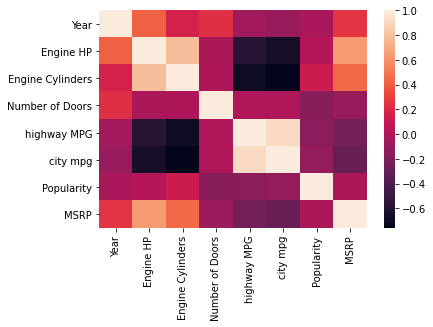

In [ ]:
sns.heatmap(data=df.corr())

Heatmap merepresentasik data berdasarkan hasil korelasi matrix. warna gelap berarti nilai korelasi semakin kecil, warna terang berarti nilai korelasi semakin tinggi

rentang nilai korelasi yaitu dari 0 hingga 1 baik positif maupun negatif

Bar Plot

In [ ]:
df['Year'].value_counts() #menampilkan jumlah mobil berdasarkan tahun 

2009    364
2007    334
2008    322
2003    238
2004    235
2005    213
2002    205
2006    194
2001    168
1997    166
1993    160
1998    145
1994    129
1992    127
1995    117
2000    115
1996    115
1999    114
1991    103
1990     77
Name: Year, dtype: int64

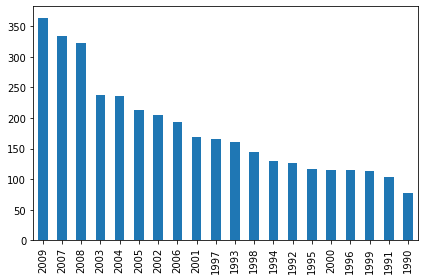

In [ ]:
df['Year'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

Data di visualisasikan menggunakan bar plot

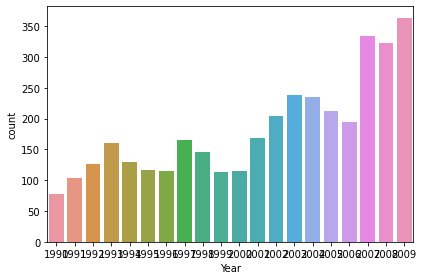

In [ ]:
sns.countplot(data=df, x='Year')
plt.tight_layout()
#sns.conplot
#visualisasi data menggunakan module seaborn

Pie Chart

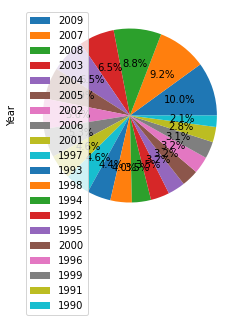

In [ ]:
df['Year'].value_counts().plot.pie(autopct='%1.1f%%',labels=None, legend=True)
plt.show()

Line Plot

Text(0.5, 1.0, 'Number of Doors')

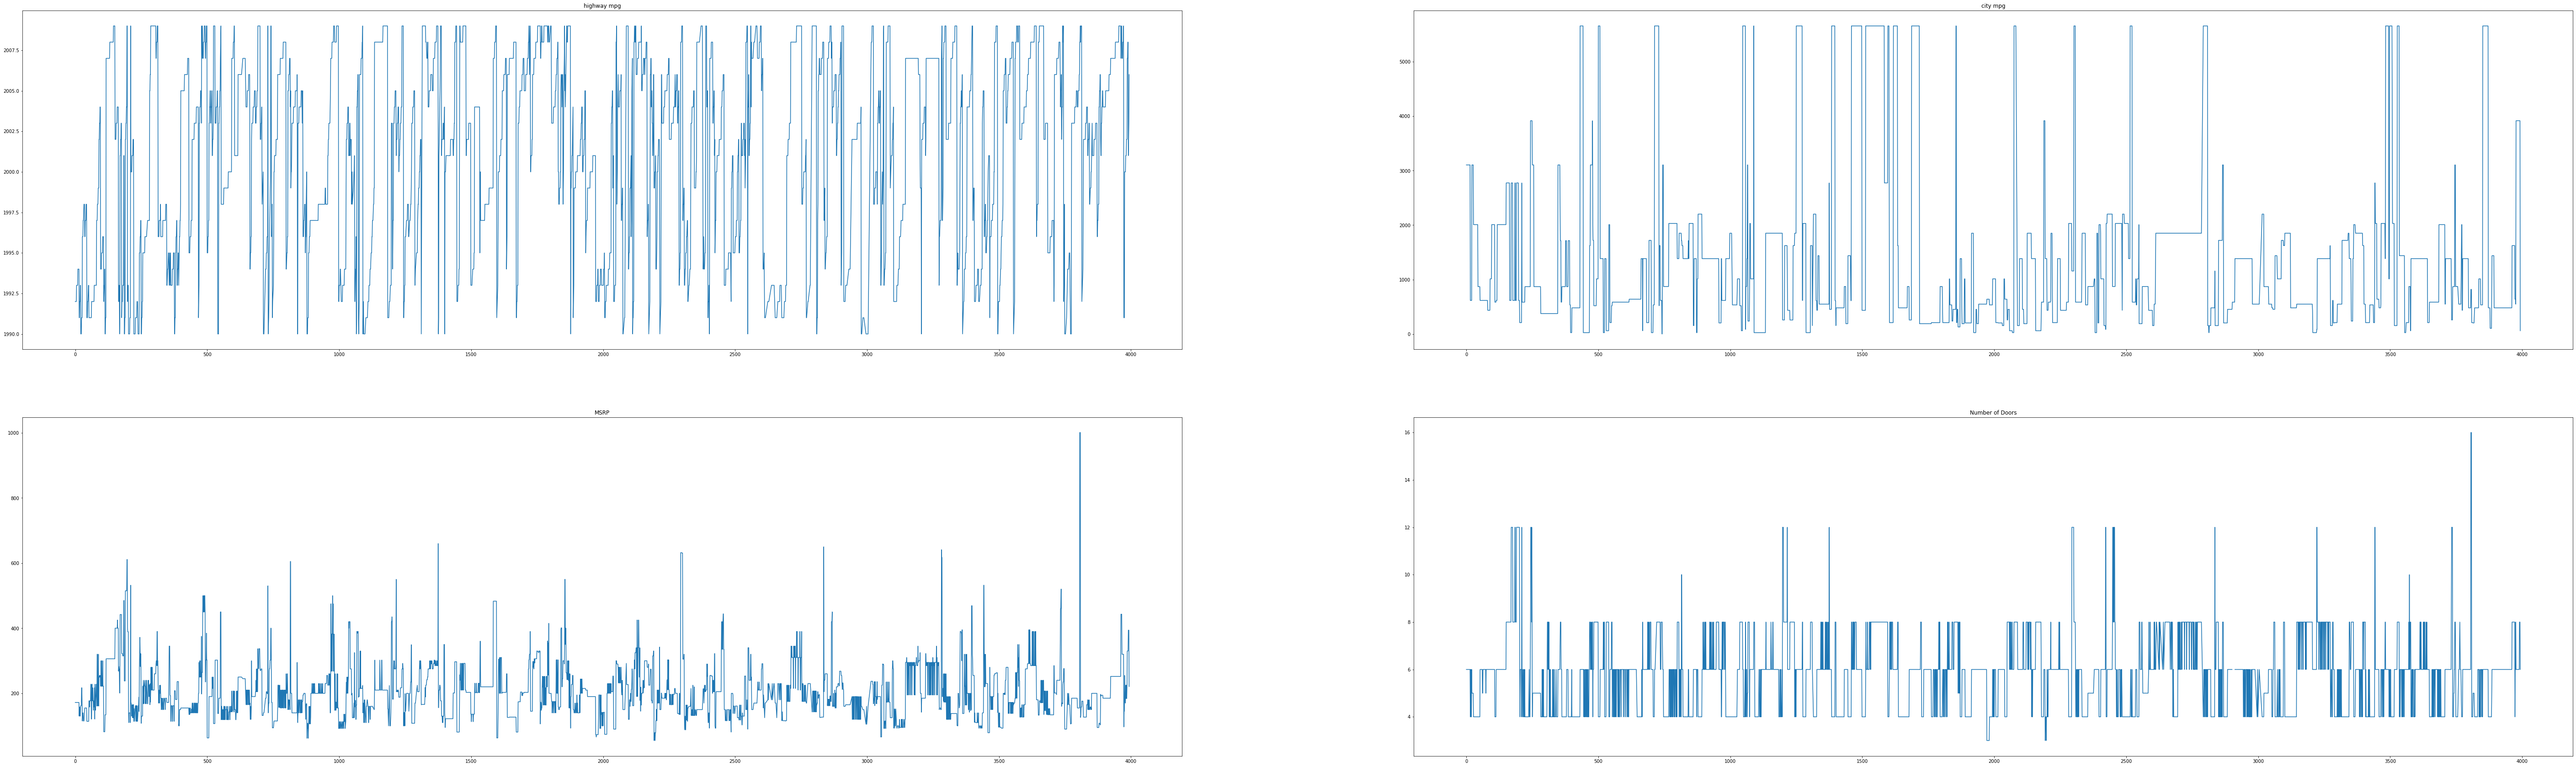

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(75,30))

#year ,pupolarity, highway mpg, city mpg
df['Year'].plot.line(ax=ax[0][0])
ax[0][0].set_title('highway mpg')

df['Popularity'].plot.line(ax=ax[0][1])
ax[0][1].set_title('city mpg')

df['Engine HP'].plot.line(ax=ax[1][0])
ax[1][0].set_title('MSRP')

df['Engine Cylinders'].plot.line(ax=ax[1][1])
ax[1][1].set_title('Number of Doors')

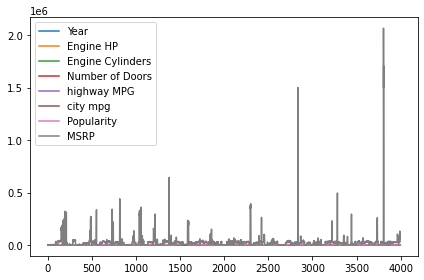

In [ ]:
df.plot()
plt.tight_layout()

Histogram

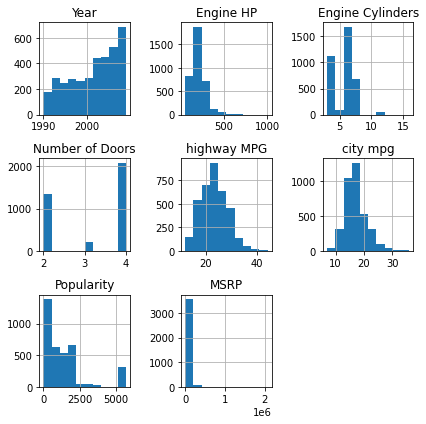

In [ ]:
df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

Box plot

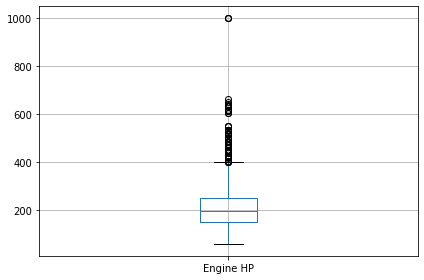

In [ ]:
df.boxplot('Engine HP')
plt.tight_layout()

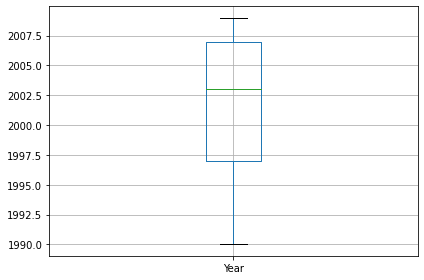

In [ ]:
df.boxplot('Year')
plt.tight_layout()

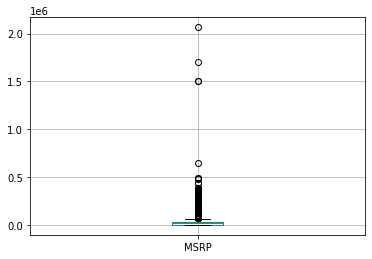

In [ ]:
df.boxplot('MSRP')
plt.show()

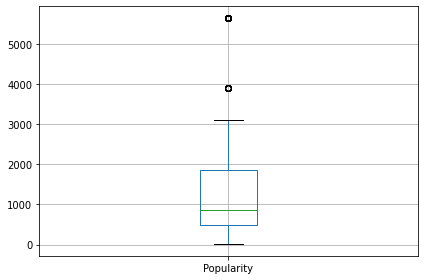

In [ ]:
df.boxplot('Popularity')
plt.tight_layout()
# df.columns

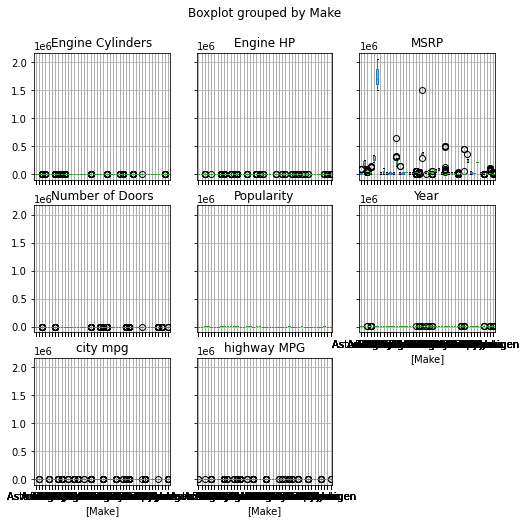

In [ ]:
df.boxplot(by="Make", figsize=(8,8))
plt.show()

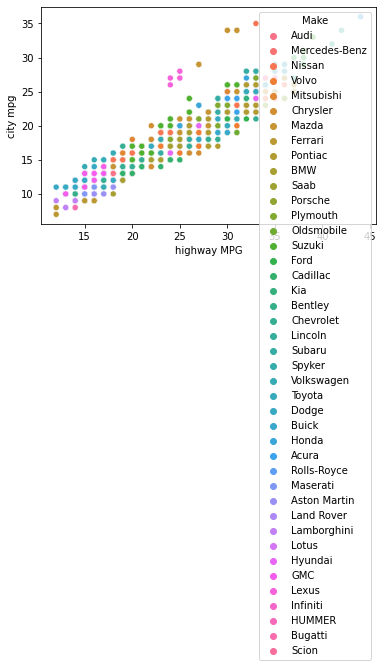

In [ ]:
sns.scatterplot(x='highway MPG', y='city mpg', data=df, hue='Make')
plt.show()

Pair plot

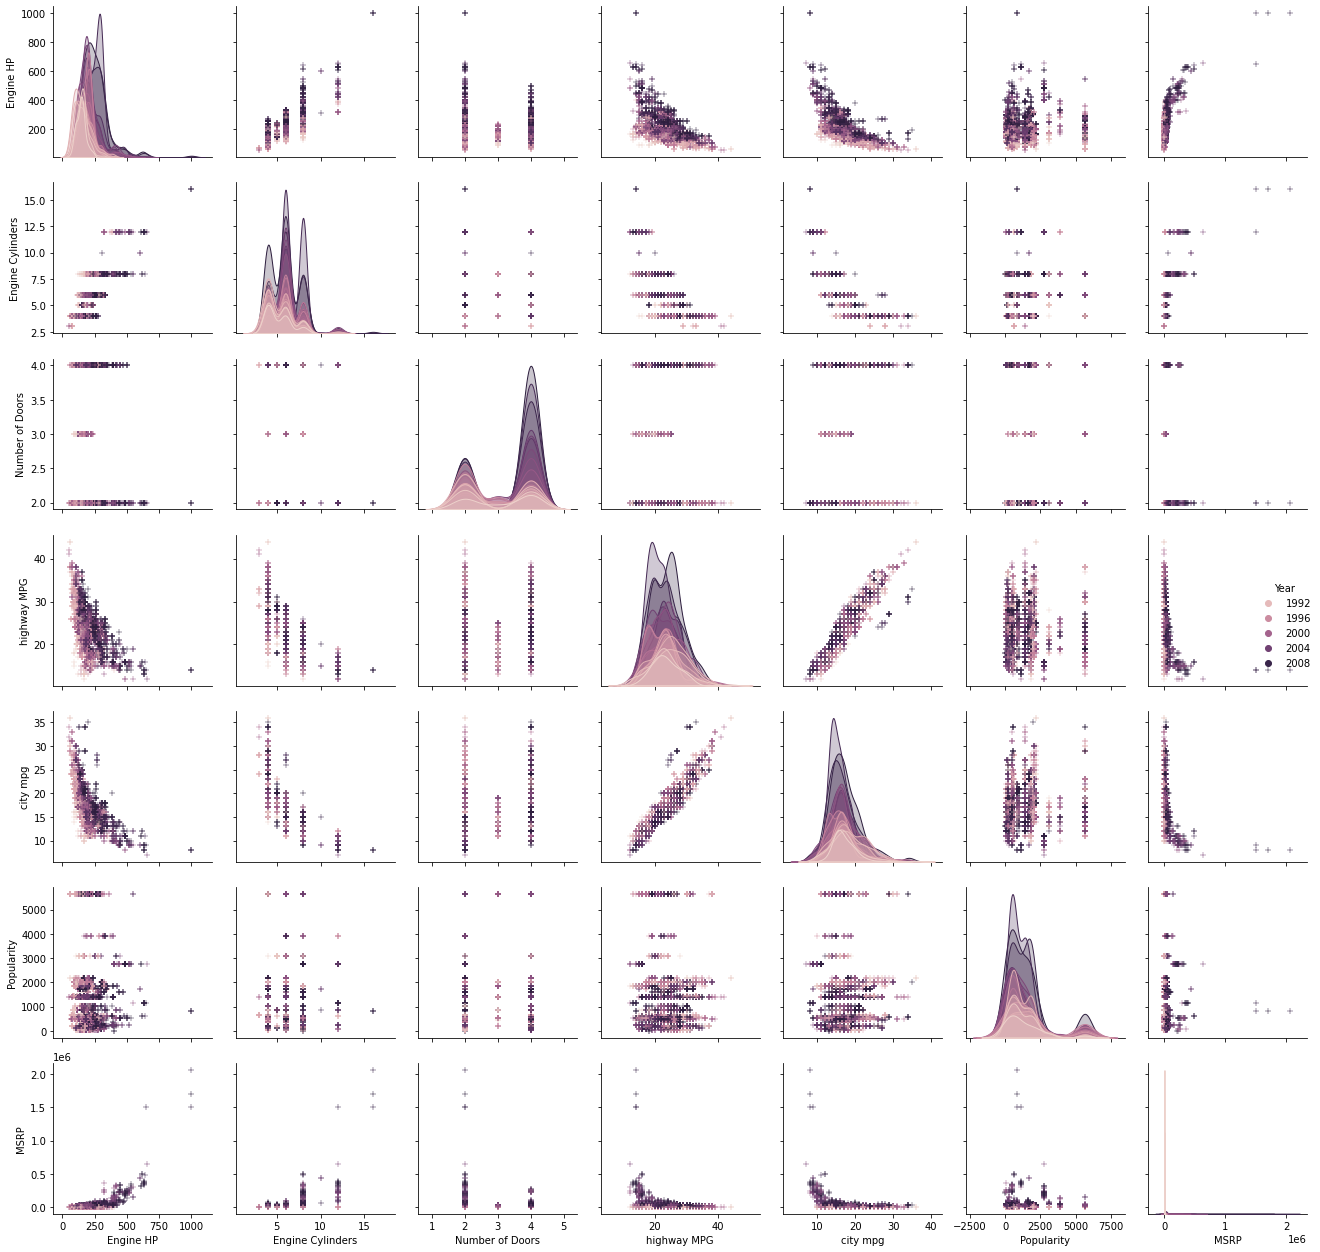

In [ ]:
sns.pairplot(df, hue='Year', markers='+')
plt.tight_layout()

Violin Plot

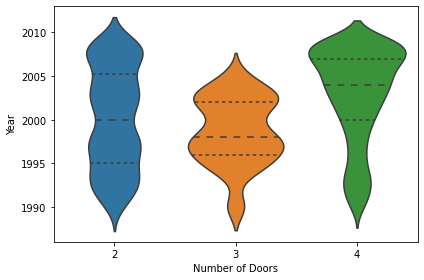

In [ ]:
sns.violinplot(data=df, y='Year', x='Number of Doors', inner='quartile')
plt.tight_layout()

Dataset : clasification models

import modules

In [ ]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641 entries, 0 to 3993
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               3641 non-null   object 
 1   Model              3641 non-null   object 
 2   Year               3641 non-null   int64  
 3   Engine Fuel Type   3638 non-null   object 
 4   Engine HP          3635 non-null   float64
 5   Engine Cylinders   3631 non-null   float64
 6   Transmission Type  3641 non-null   object 
 7   Driven_Wheels      3641 non-null   object 
 8   Number of Doors    3641 non-null   int64  
 9   Market Category    1786 non-null   object 
 10  Vehicle Size       3641 non-null   object 
 11  Vehicle Style      3641 non-null   object 
 12  highway MPG        3641 non-null   int64  
 13  city mpg           3641 non-null   int64  
 14  Popularity         3641 non-null   int64  
 15  MSRP               3641 non-null   int64  
dtypes: float64(2), int64(6),

Dataset : features & Class label

In [ ]:
X = df.drop(columns=['Model','Make', 'Engine HP', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category','Vehicle Size', 'Vehicle Style','Engine Cylinders']) # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama
# data yang dimasukkan di variable X diatas tidak dipakai

,Year,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,1992,4,24,17,3105,2000
2,1992,4,20,16,3105,2000
4,1992,4,21,16,3105,2000
5,1993,4,24,17,3105,2000
6,1993,4,20,16,3105,2000


In [ ]:
y = df['Make'] # menempatkan class label (target) ke dalam variabel y
y.head()
# tampilkan 5 baris pertama

0    Audi
2    Audi
4    Audi
5    Audi
6    Audi
Name: Make, dtype: object

Split the dataset into a training set and testing set

In [ ]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

#pembagian dilakukan dengan perbandingan 60:40

training dataset
(2184, 6)
(2184,)

testing dataset:
(1457, 6)
(1457,)


K Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,100))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

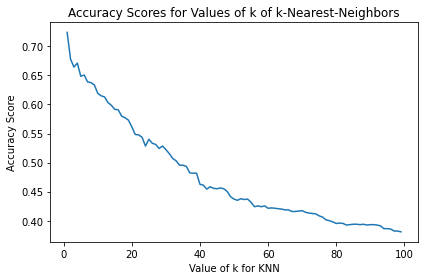

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

Acccuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.664378860672615


Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[19  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 10  2]
 [ 0  0  0 ...  0  0 36]]


Corelation report

In [ ]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

               precision    recall  f1-score   support

        Acura       0.42      0.59      0.49        32
 Aston Martin       0.00      0.00      0.00         5
         Audi       1.00      0.93      0.96        28
          BMW       1.00      0.90      0.95        10
      Bentley       0.00      0.00      0.00         2
      Bugatti       1.00      1.00      1.00         1
        Buick       0.30      0.40      0.34        30
     Cadillac       0.68      0.77      0.72        22
    Chevrolet       0.87      0.94      0.90       175
     Chrysler       0.73      0.56      0.64        48
        Dodge       0.73      0.95      0.82       104
      Ferrari       0.64      0.74      0.68        19
         Ford       0.99      1.00      1.00       125
          GMC       0.50      0.55      0.52        91
       HUMMER       0.00      0.00      0.00         3
        Honda       0.71      0.18      0.29        28
      Hyundai       0.64      0.44      0.52        16
     Infi

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

Accuracy Score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.24159231297185998


Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Clasification Report

In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

        Acura       0.00      0.00      0.00        32
 Aston Martin       0.00      0.00      0.00         5
         Audi       0.00      0.00      0.00        28
          BMW       0.00      0.00      0.00        10
      Bentley       0.14      1.00      0.25         2
      Bugatti       0.00      0.00      0.00         1
        Buick       0.00      0.00      0.00        30
     Cadillac       0.00      0.00      0.00        22
    Chevrolet       0.21      1.00      0.35       175
     Chrysler       0.00      0.00      0.00        48
        Dodge       0.00      0.00      0.00       104
      Ferrari       0.86      1.00      0.93        19
         Ford       0.51      1.00      0.67       125
          GMC       0.09      0.09      0.09        91
       HUMMER       0.00      0.00      0.00         3
        Honda       0.00      0.00      0.00        28
      Hyundai       0.00      0.00      0.00        16
     Infi

Support Vector Clasifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

Decision Tree Clasifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

Random Forest Clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

Accuracy Comparison for various models

In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.664378860672615, 0.24159231297185998, 0.17158544955387783, 0.9986273164035689, 0.9787234042553191]


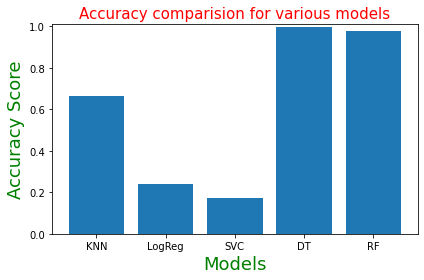

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.0,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()

Didapat hasil perbandingan data yang divisualisasikan.